## <center>4. Feladatsor</center>

<img src="toohappy.gif" width="700">

<br>
<b>1.feladat.</b>  A spline beépített függvény segítségével az $x=0,\ 1,\ 2.5,\ 3.6,\ 5,\ 7,\ 8.1,\ 10$ osztópontokon készítsük el a $\sin(x)$ függvény spline interpoláltját! Ábrázoljuk egy ábrán a két függvényt és lássuk el őket címkével!

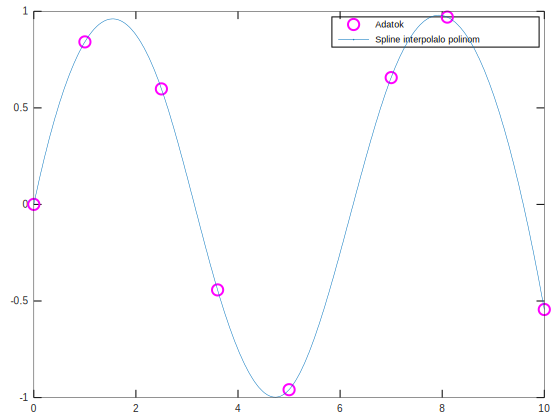

In [1]:
x = [0, 1, 2.5, 3.6, 5, 7, 8.1, 10];
y = sin(x);

xx = x(1):0.01:x(end);
P = spline(x,y); % Kobos spline interpolalo polinomot (kulonbozo peremfeltetelek vannak)
PP = spline(x,y,xx); % Finomabb spline mar kiertekelve

plot(x,y,'mo',xx,PP)
legend('Adatok','Spline interpolalo polinom')

<br>
<b>2.feladat.</b> Adjuk meg a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ egyenest és parabolát a Gauss-féle normál-egyenlet segítségével!


  <tr>
<td>t_i | -2 | -1 | 1 | 2 </td>
  </tr>
  <br>
  <tr>
    <td>f_i | 3 | 1 | 0 | 2   </td>
  </tr>




Számítsuk ki a maradékvektor euklideszi hosszának négyzetét!<br>

x =

   1.50000
  -0.30000



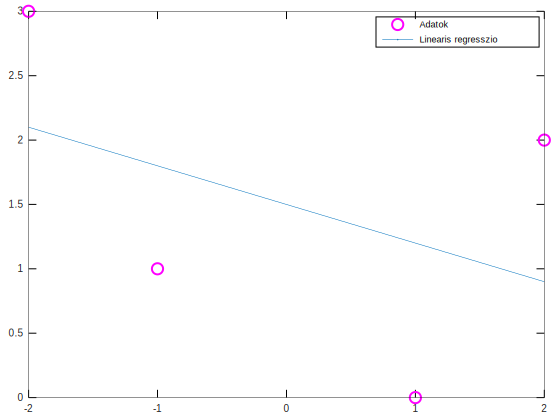

In [2]:
% Amit a gyakorlati feladatsoron lathattatok, az
% a Gauss-fele normalegyenlet polinom esete n=1-re 2-es normaban

%% Egyenes (linearis regresszio)
t = [-2 -1 1 2];
f = [3 1 0 2];


M = [length(t) sum(t); sum(t) sum(t.^2)];
% x = a + b*t
f_hullam = [sum(f) t*f']';

x = M\f_hullam %% F(t) = 1.5 -0.3*t

tt = t(1):0.01:t(end);

plot(t,f,'mo',tt,1.5-0.3*tt)
legend('Adatok','Linearis regresszio')


A = [ones(length(t),1) t'];

%% A Gauss fele normalegyenlet: A'Ax=A'f egyenlet megoldasa
M;
A'*A;

f_hullam;
A'*f';


A =

   1  -2   4
   1  -1   1
   1   1   1
   1   2   4

x =

  -0.16667
  -0.30000
   0.66667



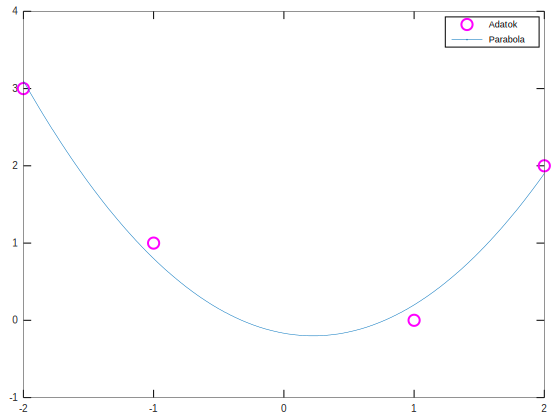

In [3]:
%% Parabola
t = [-2 -1 1 2];
f = [3 1 0 2];
A = [ones(length(t),1) t' t.^2' ]

%% A Gauss fele normalegyenlet: A'Ax=A'f egyenlet megoldasa
x = (A'*A)\A'*f'

% Plot
tt = t(1):0.01:t(end);
plot(t,f,'mo',tt,x(1)+x(2)*tt+x(3)*tt.^2)
legend('Adatok','Parabola')


In [4]:
%% Maradekvektor euklideszi hosszanak negyzete lin.reg es parabola eseten

<br>
<b>3.feladat.</b> Oldjuk meg az előző feladatot beépített függvények segítségével!

ans =

   0.66667  -0.30000  -0.16667

ans =

  -0.16667
  -0.30000
   0.66667



<br>
<b>4.feladat.</b> Írjuk legkosebbnegyzetek néven olyan programot, amely megadja a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ $n$-edfokú polinomot a Gauss-féle normál-egyenlet segítségével és kiszámíja a maradékvektor euklideszi hosszának négyzetét!

In [5]:
[x,Jnorma,MatlabPolyfit]=legkisebbnegyzetek([-2 -1 1 2],[3 1 0 2],2)

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000
MatlabPolyfit =

  -0.16667
  -0.30000
   0.66667



<br>
<b>5.feladat.</b> Írjunk olyan programot, mely az alábbi 

+ $\displaystyle \frac{f(x_0+h)-f(x_0)}{h}$<br>
+ $\displaystyle \frac{f(x_0+h)-f(x_0-h)}{2h}$<br>
+ $\displaystyle \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}$<br>

véges differenciahányadokosat kiszámolja adott függvényre, adott pontban és adott lépésközzel. Eredményeinket vessük össze a megfelelő derivált értékekkel!

In [4]:
[elso, elsoketto, masodik] = derivalt(@(x)(sin(x)),0.4,0.1)


elso =  0.90007
elsoketto =  0.91953
masodik = -0.38909
ans =  0.92106
ans = -0.38942
